In [11]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Seaborn
import seaborn as sns
# Glob
import glob

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀모델
from sklearn.neighbors import KNeighborsRegressor
# 선형회귀
from sklearn.linear_model import LinearRegression
# 다중회귀
from sklearn.preprocessing import PolynomialFeatures
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
# Grid Search
from sklearn.model_selection import GridSearchCV
# Extra Tree
from sklearn.ensemble import ExtraTreesClassifier
# Gradient Boostring
from sklearn.ensemble import GradientBoostingClassifier
# Histogram gradient boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
# XGBoost
from xgboost import XGBClassifier
# Permutation Importance (치환중요도)
from sklearn.inspection import permutation_importance

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

from sklearn import datasets

# k-Means Model
from sklearn.cluster import KMeans
# PCA
from sklearn.decomposition import PCA

# 교차 검증
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
# 표준화
from sklearn.preprocessing import StandardScaler
# Lasso (L1)
from sklearn.linear_model import Lasso
# Ridge (L2)
from sklearn.linear_model import Ridge
# 확률적 경사하강법
from sklearn.linear_model import SGDClassifier

# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score
# Sigmoid
from scipy.special import expit
# SoftMax
from scipy.special import softmax
# KFold
from sklearn.model_selection import StratifiedKFold

# Image 저장
from PIL import Image

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 주성분 분석(PCA: Principal Component Analysis)
- 고차원의 데이터를 저차원의 데이터로 환원시키는 법

In [12]:
fruits = np.load('../Data/fruits.npy')

In [13]:
# 2차원 배열
fruits_2d = fruits.reshape(-1, 100*100)

---
### PCA 모델 구성하기

In [14]:
pca = PCA(n_components=50) # 300개의 데이터중 구별이 확실한 주성분 50개 선택
pca.fit(fruits_2d)

PCA(n_components=50)

In [15]:
pca.components_.shape

(50, 10000)

In [16]:
def draw_fruits(arr, ratio=1): # ratio : 해상도 크기
    n = len(arr) # n : 샘플의 개수
    # 한줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이며 열 개수는 샘플 개수이고 그렇지 않으면 10개 입니다. 
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10+j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

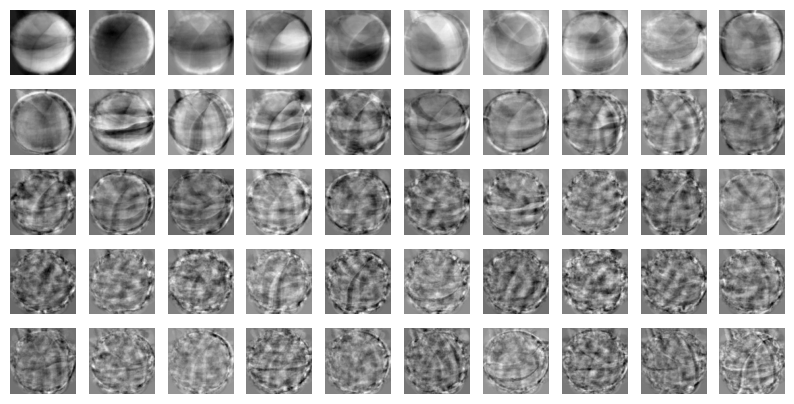

In [18]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [19]:
# 행의 개수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


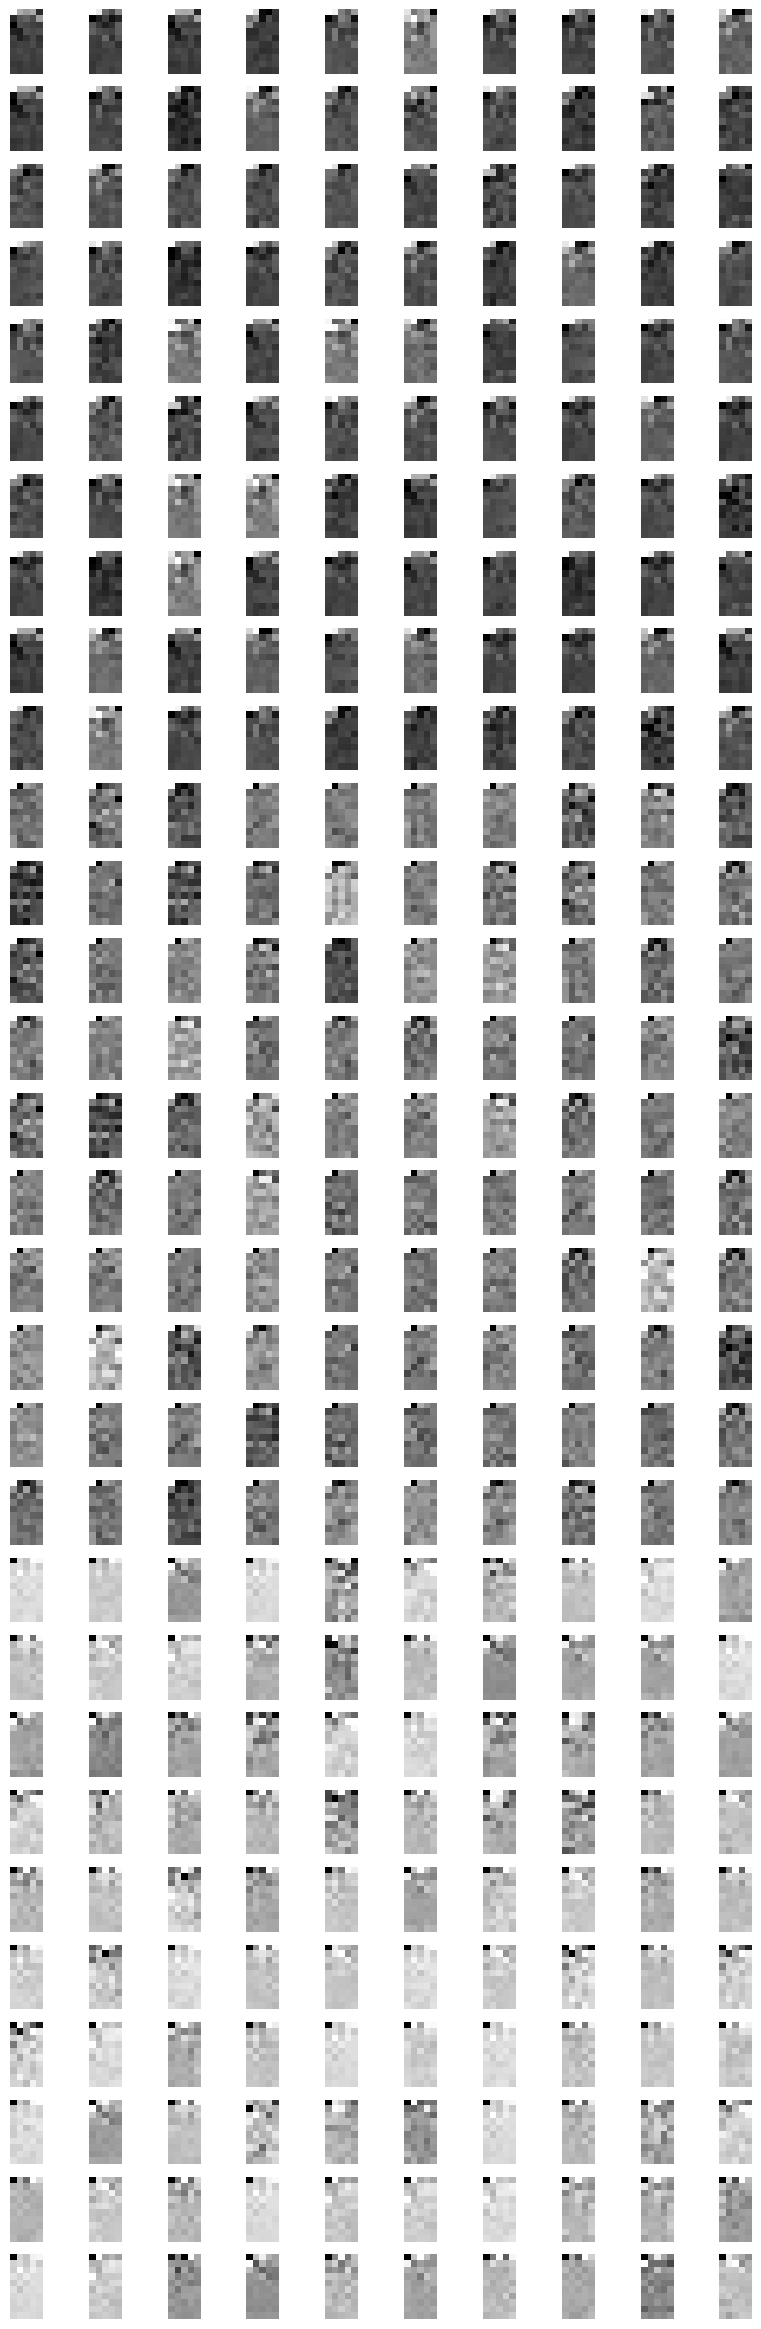

In [20]:
draw_fruits(fruits_pca.reshape(-1,10,5))

---
### 원본 데이터 재구성

In [21]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [22]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
fruits_reconstruct.shape

(300, 100, 100)

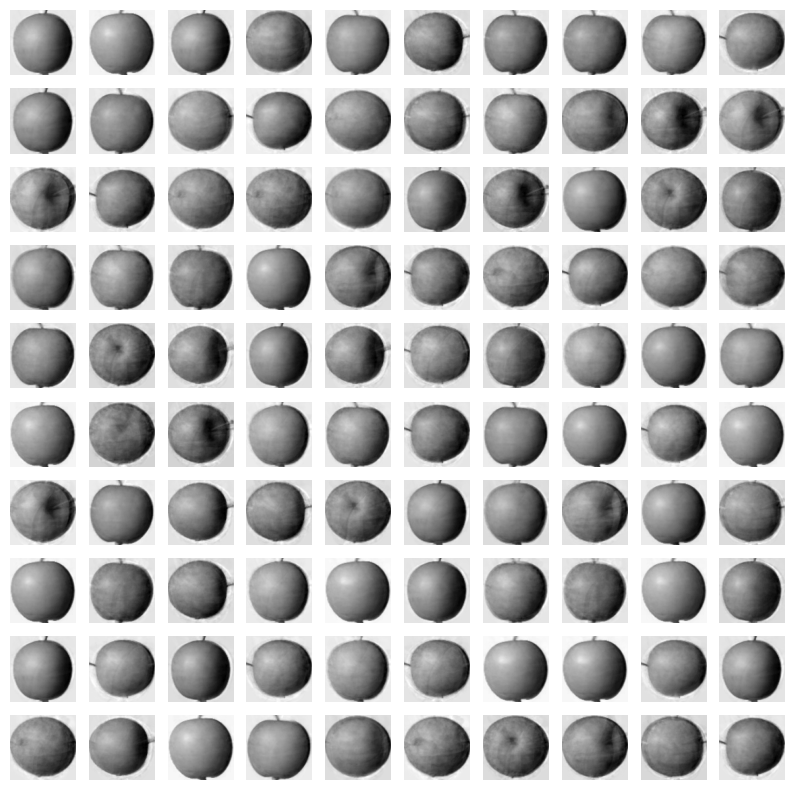

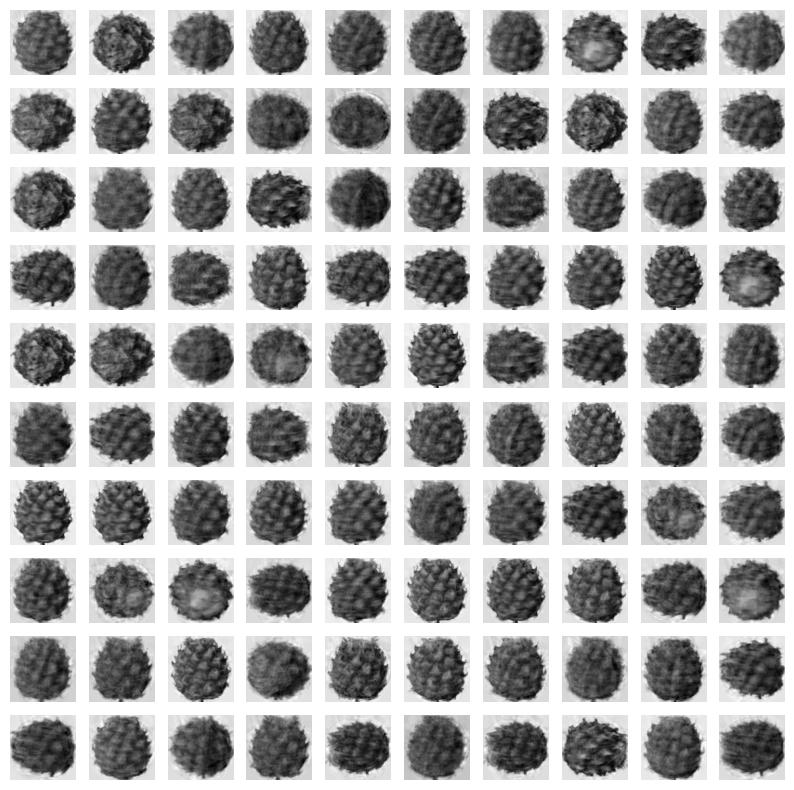

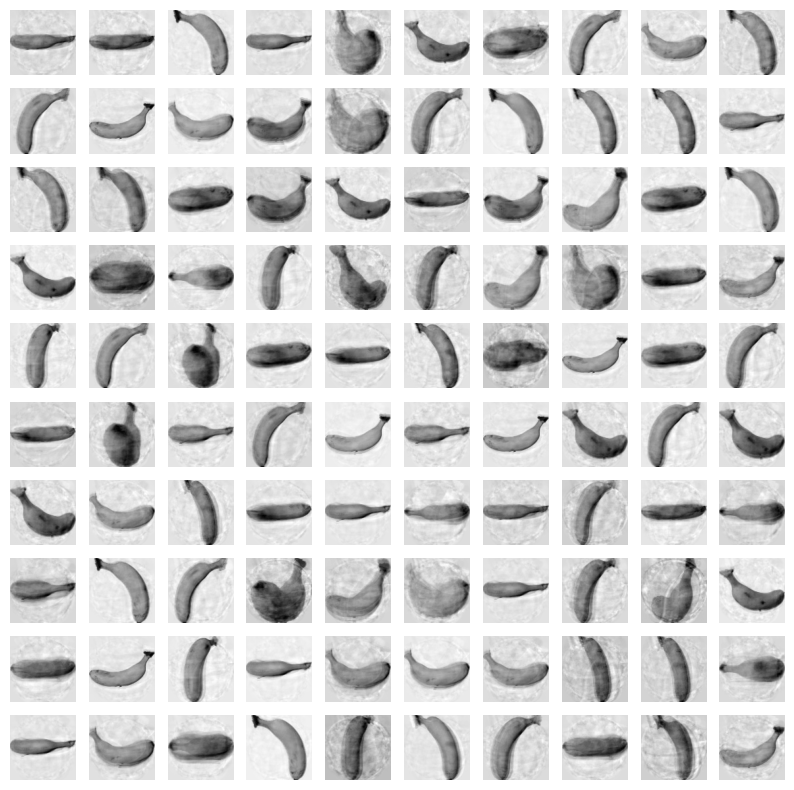

In [30]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])

1/200의 데이터 특성만 가지고도 전박적으로 배경은 깨끗하지 않으나 물체의 구분은 가능하다.

In [27]:
# 복원 능력
np.sum(pca.explained_variance_ratio_)

0.9222774617924223

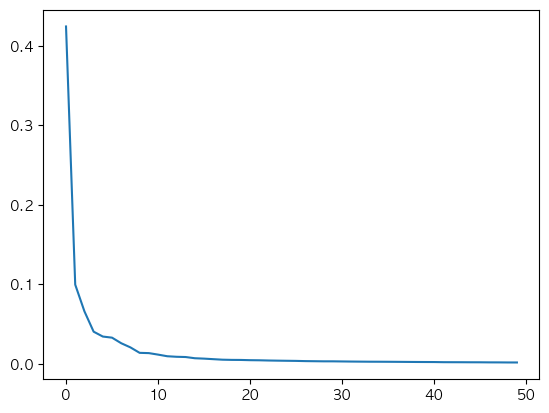

In [29]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 10개만 주성분으로 잡아도 문제 없을 것 같아 보인다.

In [31]:
pca10 = PCA(n_components=10)
pca10.fit(fruits_2d)

PCA(n_components=10)

In [33]:
pca10.components_.shape

(10, 10000)

In [35]:
print(fruits_2d.shape)
fruits_pca10 = pca10.transform(fruits_2d)
print(fruits_pca10.shape)

(300, 10000)
(300, 10)


In [36]:
# 원본 재구성
fruits_inverse_10 = pca10.inverse_transform(fruits_pca10)
fruits_inverse_10.shape

(300, 10000)

In [37]:
fruits_reconstruct10 = fruits_inverse_10.reshape(-1, 100, 100)
fruits_reconstruct10.shape

(300, 100, 100)

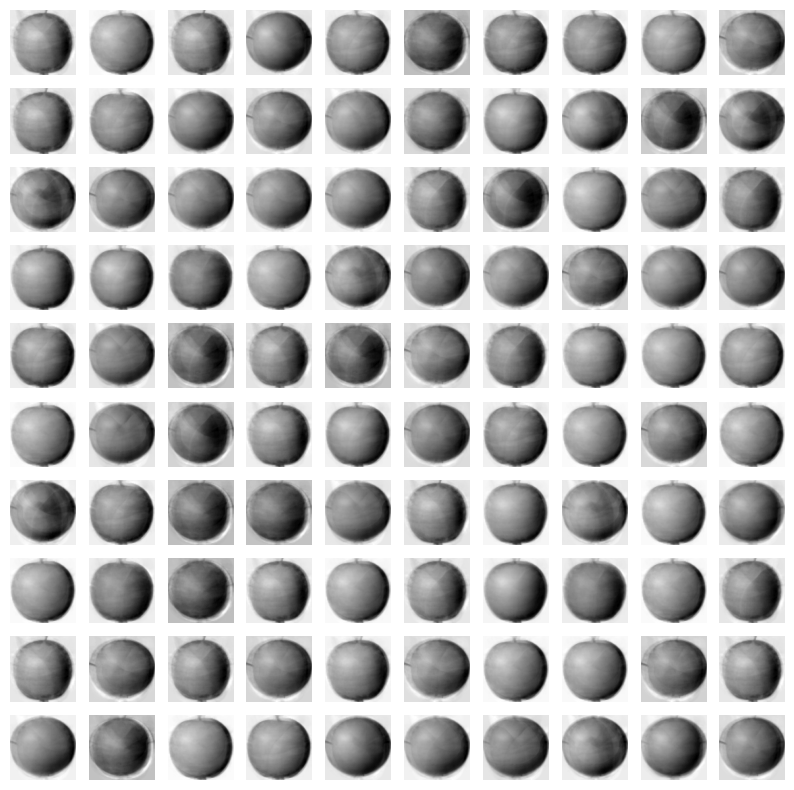

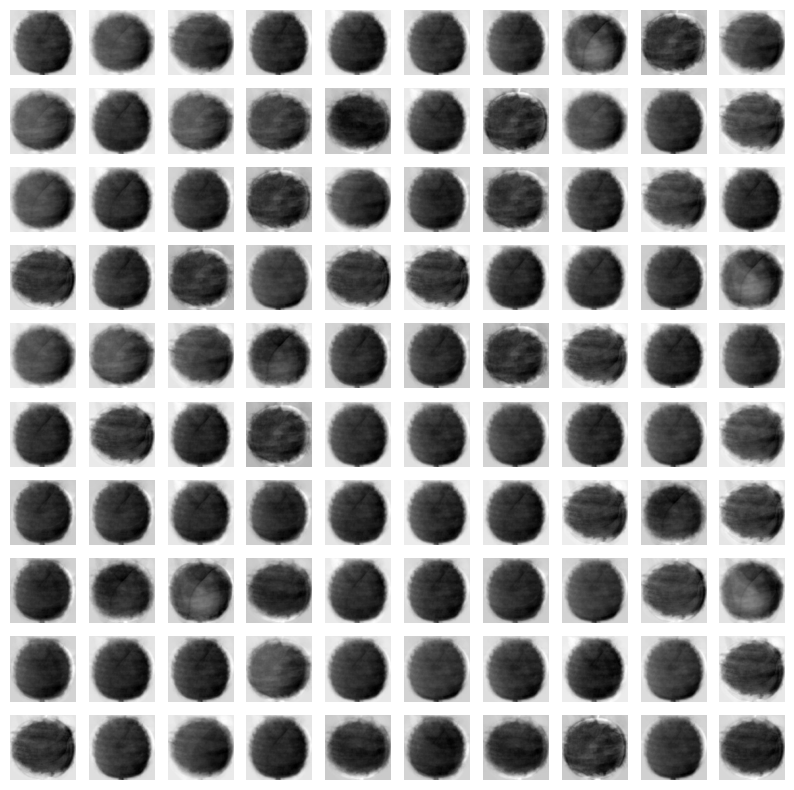

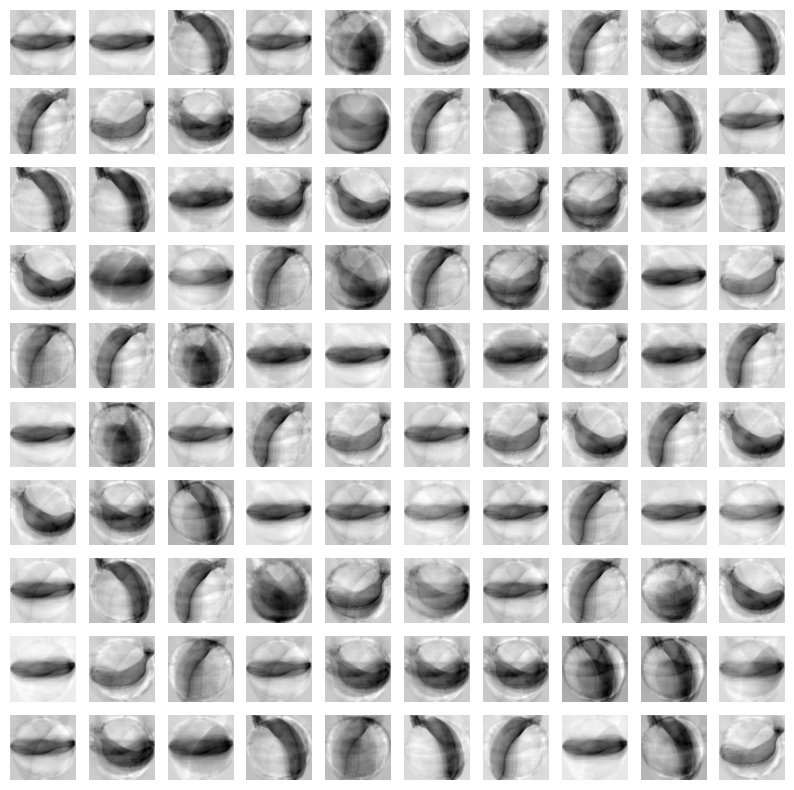

In [38]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct10[start:start+100])

In [39]:
np.sum(pca10.explained_variance_ratio_)

0.7711095905612154

---
### 로지스틱 회귀분석에 주성분 분석을 대입하여 사용해 보기

In [40]:
lr = LogisticRegression()

In [41]:
# 로지스틱 회귀분석은 지도학습이므로 Target이 필요하다.
target = np.array([0]*100 + [1]*100 + [2]*100)

In [43]:
# 교차검증을 통해 실시
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.49876937866210935


In [44]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.00612797737121582


In [45]:
scores = cross_validate(lr, fruits_pca10, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.006198501586914063
